<center>
    <h1> 
        Alargamento de contraste
    </h1>
</center>
    <div style="text-align: right;"><h3>
        Carlos Eduardo Cassimiro da Silva
    </h3></div>

<center>
    <h4>Reprodução da figura 3.10 do livro Processamento Digital de Imagens (Gonzalez, Rafael C.)</h4>
</center>


<h4> Fonte da imagem </h4>
DIP3E_CH03_Original_Images.zip <br>
http://www.imageprocessingplace.com/DIP-3E/dip3e_book_images_downloads.htm

---

##### Módulos utilizados

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
from scipy.interpolate import interp1d

In [2]:
plt.style.use('ggplot')

## 1. Visualizando a imagem orignal

In [3]:
# Abrindo a imagem
img = cv2.imread('imagens_originais/Fig3.10.jpg')

In [4]:
# Por alguma razão, a função de converter uma imagem colorida para cinza
# melhorou a qualidade da imagem, inclusive melhorando o contrasnte.
# Então utilizei um método próprio para manter o aspecto original da imagem,
# e depois utilizar a função do openCV
def colored_to_gray(image):
    rows, cols, _  = image.shape
    image_gray = image*0 # multipliquei por 0 para não precisar usar o deepcopy
    for i in range(rows):
        for j in range(cols):
            pixel = image[i][j]
            gray_pixel = pixel[0]*0.2989 + pixel[1]*0.5870 + pixel[2]*0.1140
            image_gray[i][j] = [gray_pixel, gray_pixel, gray_pixel]
    return image_gray

In [5]:
img = colored_to_gray(img) # Aplicando na imagem

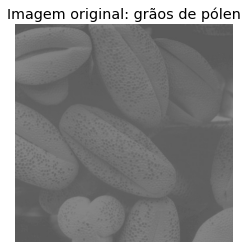

In [6]:
# Plotando a imagem original
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Imagem original: grãos de pólen')
plt.show()

## 2.  Alargamento de contraste
### 2.1 Função de alargamento

Uma das mais simples funções lineares definidas por partes é a transformação de alargamento de contraste. Imagens de baixo contraste podem resultar de uma iluminação ruim, de uma faixa dinâmica insuficiente no sensor de imagem ou até mesmo de uma configuração errada da abertura de uma lente no momento da aquisição da imagem. O alargamento de contraste é um processo que expande a faixa de níveis de intensidade de uma imagem de modo a incluir todo o intervalo de intensidades do meio de gravação ou do dispositivo de exibição.

In [7]:
# Obtando o valor mínimo e o valor máximo da imagem
min_value = np.min(img)
max_value = np.max(img)

In [8]:
# Definindo a amplitude máxima da imagem (Para facilitar a visualização dos cálculos)
L = 255

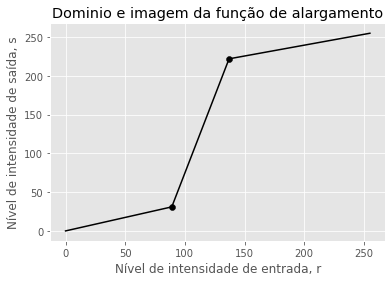

In [9]:
# Plotando a função de alargamento / espalhamento seguindo as recomendações do livro
plt.scatter([min_value,max_value],[L//8,7*(L-1)//8], c='black')
plt.plot([0,min_value,max_value,L],[0,L//8,7*(L-1)//8,L], c='black')
plt.xlabel('Nível de intensidade de entrada, r')
plt.ylabel('Nível de intensidade de saída, s')
plt.title('Dominio e imagem da função de alargamento')
plt.show()

### 2.2 Aplicando na imagem original

In [10]:
# Para fazermos o espalhamento, utilizarei uma função de interpaloção dominio-imagem,
# para assim conseguir distribuir os valores da imagem em uma nova escala.
# O valores dessa função de alargamento seguem as recomendações do livro.
rescale = interp1d([min_value+1,max_value-1],[L//8,7*(L-1)//8])

In [11]:
# Aplicamendo na imagem
img2 = deepcopy(img)
for i in range(len(img)):
    for j in range(len(img[0])):
        if img[i][j][0] == min_value:
            img2[i][j] = [0,0,0]
        elif img[i][j][0] == max_value:
            img2[i][j] = [255,255,255]
        else:
            new_value = rescale(img[i][j][0])
            img2[i][j] = [new_value,new_value,new_value]

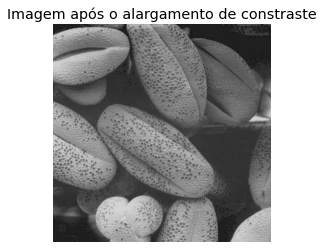

In [12]:
# Plotando o resultado
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.title('Imagem após o alargamento de constraste')
plt.show()

## 3. Limiarização

In [13]:
# Calculando a média para a limialização
average = (min_value + max_value)//2

In [14]:
# Aplicando na imagem original
img3 = deepcopy(img)
for i in range(len(img)):
    for j in range(len(img[0])):
        if img[i][j][0] <= average-3: # Precisei ajustar o valor da média para ficar com o resultado igual o do livro
            img3[i][j] = [0,0,0]
        elif img[i][j][0] > average-3:
            img3[i][j] = [255,255,255]

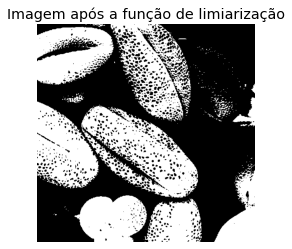

In [15]:
# Plotando a imagem
plt.imshow(img3, cmap='gray')
plt.axis('off')
plt.title('Imagem após a função de limiarização')
plt.show()

## 4. Juntando tudo

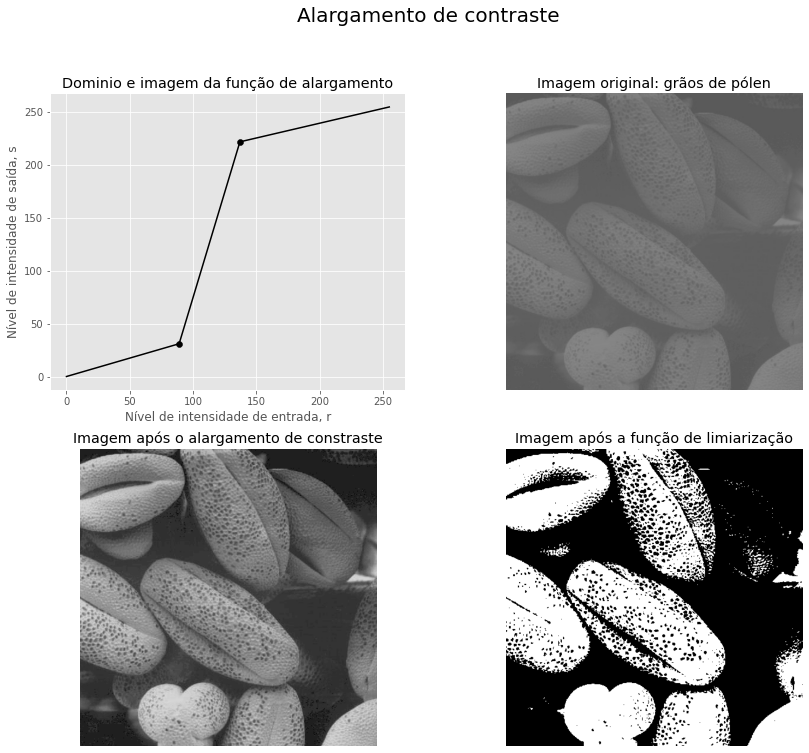

In [16]:
fig = plt.figure(figsize=(14,12))

fig.add_subplot(2,2,1); 
plt.scatter([min_value,max_value],[L//8,7*(L-1)//8], c='black')
plt.plot([0,min_value,max_value,L],[0,L//8,7*(L-1)//8,L], c='black')
plt.xlabel('Nível de intensidade de entrada, r')
plt.ylabel('Nível de intensidade de saída, s')
plt.title('Dominio e imagem da função de alargamento')

fig.add_subplot(2,2,2); plt.axis('off')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Imagem original: grãos de pólen')

fig.add_subplot(2,2,3); 
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.title('Imagem após o alargamento de constraste')

fig.add_subplot(2,2,4); 
plt.imshow(img3, cmap='gray')
plt.axis('off')
plt.title('Imagem após a função de limiarização')

fig.suptitle('Alargamento de contraste', fontsize=20)
plt.show()